In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)
x = np.random.randn(30)
y = -0.5*x**4 + 2*x**3 -3 + np.random.randn(len(x))

# \begin{equation}y=-\frac{1}{2} x^{4} + 2x^{3} - 3 + \mathcal{N}(0,1)\end{equation}

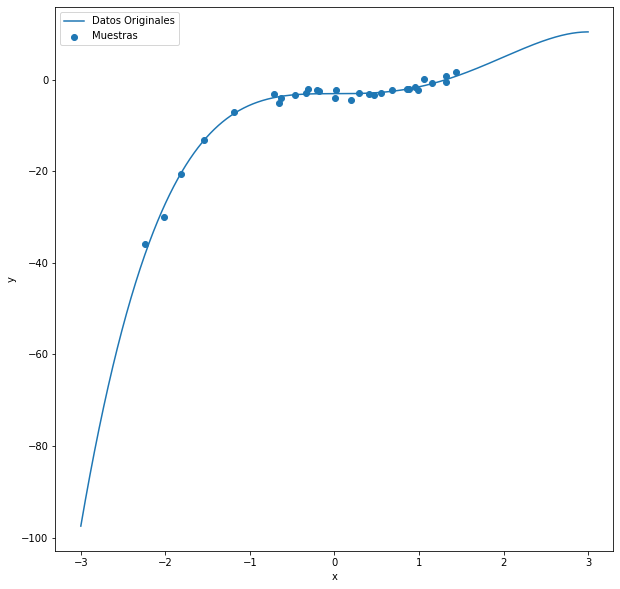

In [6]:
xx = np.linspace(-3,3,1000)
fnc = lambda x: -0.5*x**4 + 2*x**3 -3
yy = fnc(xx)
plt.figure(figsize=(10,10))
plt.plot(xx,yy,label='Datos Originales')
plt.scatter(x,y,label='Muestras')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Regresión Teorica

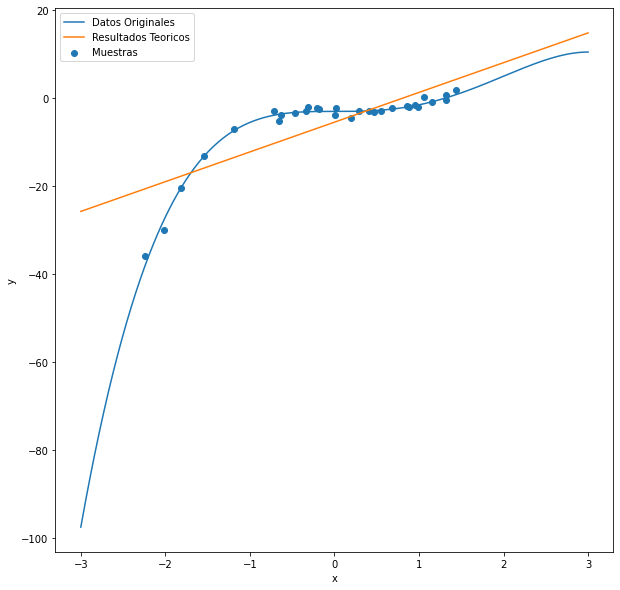

In [10]:
X = np.concatenate((np.ones(shape=(len(x),1)),x.reshape(-1,1)),axis=1)
Y = y.reshape(-1,1)
THETA = np.linalg.inv(X.T @ X) @ (X.T @ Y)
yteorico = np.concatenate((np.ones(shape=(len(xx),1)),xx.reshape(-1,1)),axis=1) @ THETA
plt.figure(figsize=(10,10))
plt.plot(xx,yy,label='Datos Originales')
plt.plot(xx,yteorico,label='Resultados Teoricos')
plt.scatter(x,y,label='Muestras')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [17]:
THETA

array([[-5.44583142],
       [ 6.76419686]])

## Polinomio teorico

In [11]:
## Polinomio orden 2
X2 = X.T @ X

# Regresion Lineal

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
print(model.intercept_)
print(model.coef_)

-5.445831421597073
[6.76419686]


In [23]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
model.coef_

array([-5.44583142,  6.76419686])

In [47]:
from sklearn.preprocessing import PolynomialFeatures

featurizer = PolynomialFeatures(degree=4,include_bias=False)

In [48]:
X[:3]

array([[ 1.        ,  0.47143516],
       [ 1.        , -1.19097569],
       [ 1.        ,  1.43270697]])

In [49]:
featurizer.fit_transform(X)[:3]

array([[ 1.        ,  0.47143516,  1.        ,  0.47143516,  0.22225111,
         1.        ,  0.47143516,  0.22225111,  0.10477699,  1.        ,
         0.47143516,  0.22225111,  0.10477699,  0.04939556],
       [ 1.        , -1.19097569,  1.        , -1.19097569,  1.41842311,
         1.        , -1.19097569,  1.41842311, -1.68930744,  1.        ,
        -1.19097569,  1.41842311, -1.68930744,  2.01192411],
       [ 1.        ,  1.43270697,  1.        ,  1.43270697,  2.05264926,
         1.        ,  1.43270697,  2.05264926,  2.94084489,  1.        ,
         1.43270697,  2.05264926,  2.94084489,  4.21336897]])

In [54]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression(fit_intercept=False))
model.fit(X, Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression(fit_intercept=False))])

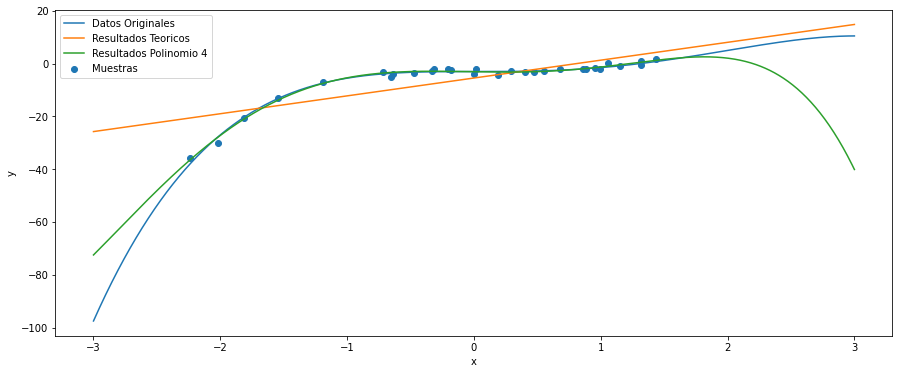

In [55]:
ypipeline = model.predict(np.concatenate((np.ones(shape=(len(xx),1)),xx.reshape(-1,1)),axis=1))
plt.figure(figsize=(15,6))
plt.plot(xx,yy,label='Datos Originales')
plt.plot(xx,yteorico,label='Resultados Teoricos')
plt.plot(xx,ypipeline,label='Resultados Polinomio 4')
plt.scatter(x,y,label='Muestras')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

In [59]:
#Size Train 70%    =21
# Size validation 20% = 6
# Size Test 10% = 3
X_train, X_ff, Y_train, Y_ff = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_ff, Y_ff, test_size=0.3)

In [62]:
X_test.shape

(3, 2)

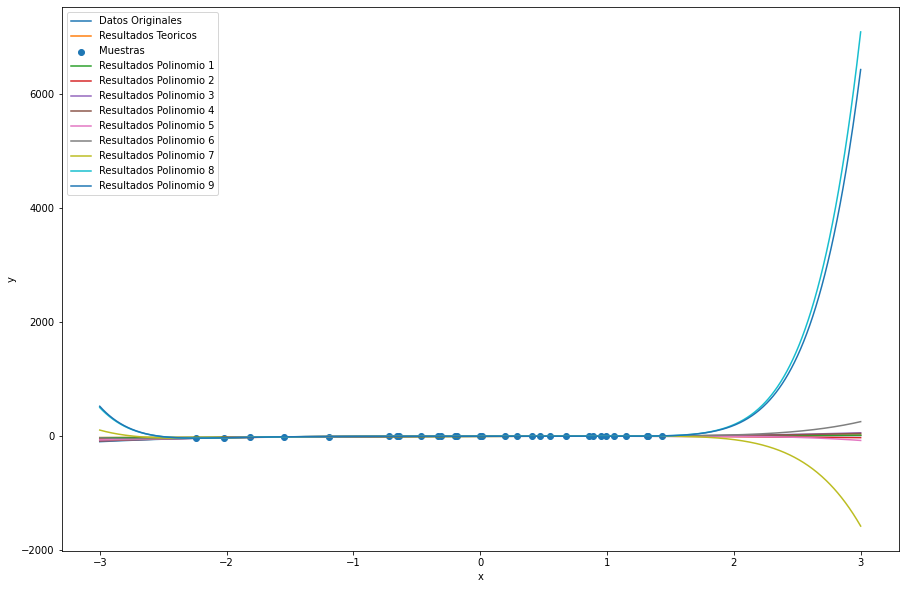

In [75]:
YPIP_TRAIN = []
YPIP_VAL = []
YPIP_TEST = []
YPIP_NEW = []
mse = lambda x,y:np.mean((x-y)**2)
for i in range(1,20):
  model = make_pipeline(PolynomialFeatures(degree=i), LinearRegression(fit_intercept=False))
  model.fit(X_train, Y_train)
  YPIP_TRAIN.append(mse(Y_train,model.predict(X_train)))
  YPIP_VAL.append(mse(Y_val,model.predict(X_val)))
  YPIP_TEST.append(mse(Y_test,model.predict(X_test)))
  YPIP_NEW.append(model.predict(np.concatenate((np.ones(shape=(len(xx),1)),xx.reshape(-1,1)),axis=1)))

plt.figure(figsize=(15,10))
plt.plot(xx,yy,label='Datos Originales')
plt.plot(xx,yteorico,label='Resultados Teoricos')
plt.scatter(x,y,label='Muestras')
plt.xlabel('x')
plt.ylabel('y')
for i in range(1,10):
  plt.plot(xx,YPIP_NEW[i-1],label='Resultados Polinomio %d'%(i))
plt.legend()
plt.show()

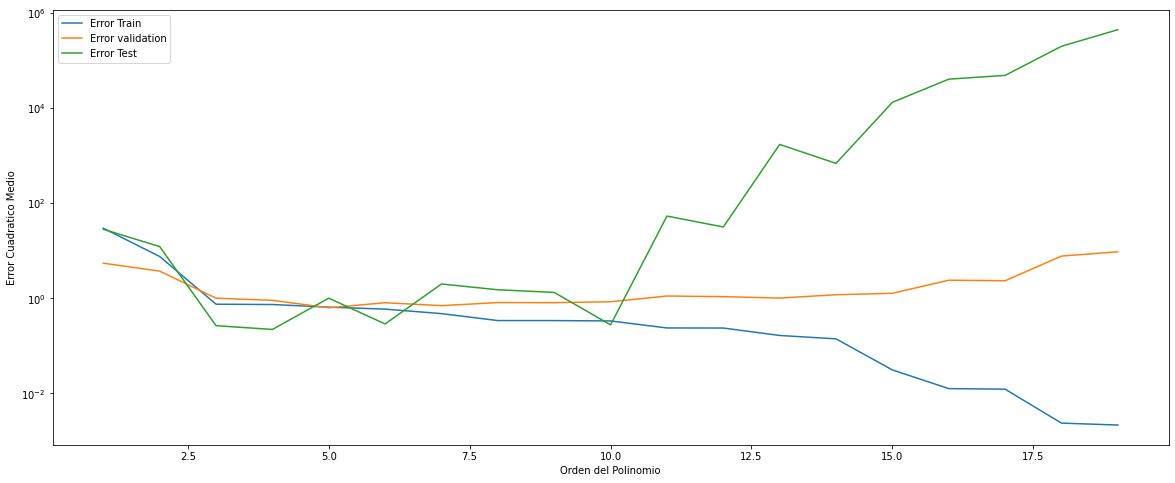

In [81]:
plt.figure(figsize=(20,8))
plt.semilogy(np.arange(1,20),np.array(YPIP_TRAIN),label='Error Train')
plt.semilogy(np.arange(1,20),np.array(YPIP_VAL),label='Error validation')
plt.semilogy(np.arange(1,20),np.array(YPIP_TEST),label='Error Test')
plt.xlabel('Orden del Polinomio')
plt.ylabel('Error Cuadratico Medio')
plt.legend()
plt.show()